In [1]:
import basico
import json
from typing import Dict
import pandas as pd
from IPython.display import display
import vcell_opt

In [2]:
optFile = "test_data/optproblem.json"
with open(optFile, "rb") as f_optfile:
    vcell_opt_problem: vcell_opt.OptProblem = vcell_opt.OptProblem.from_json_data(json.load(f_optfile))

copasi_model = basico.load_model(vcell_opt_problem.math_model_sbml_contents)
basico.get_parameters()

,type,unit,initial_value,initial_expression,expression,value,rate,key,sbml_id
name,,,,,,,,,
_F_,fixed,,9.648533e+04,,,9.648533e+04,0.0,ModelValue_0,_F_
_F_nmol_,fixed,,9.648533e-05,,,9.648533e-05,0.0,ModelValue_1,_F_nmol_
_K_GHK_,fixed,,1.000000e-09,,,1.000000e-09,0.0,ModelValue_2,_K_GHK_
_N_pmol_,fixed,,6.022142e+11,,,6.022142e+11,0.0,ModelValue_3,_N_pmol_
_PI_,fixed,,3.141593e+00,,,3.141593e+00,0.0,ModelValue_4,_PI_
_R_,fixed,,8.314463e+03,,,8.314463e+03,0.0,ModelValue_5,_R_
_T_,fixed,,3.000000e+02,,,3.000000e+02,0.0,ModelValue_6,_T_
K_millivolts_per_volt,fixed,,1.000000e+03,,,1.000000e+03,0.0,ModelValue_7,K_millivolts_per_volt
Kf,fixed,,1.000000e+00,,,1.000000e+00,0.0,ModelValue_8,Kf


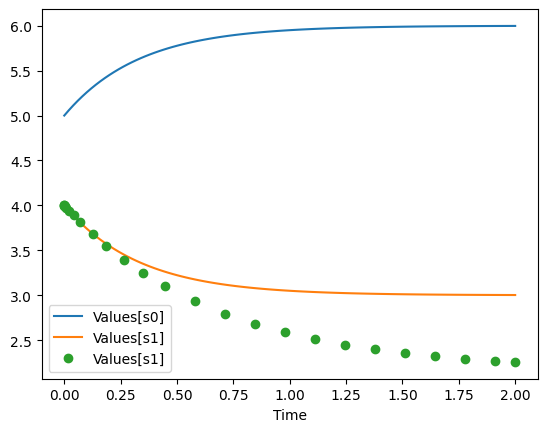

In [3]:
time_course_result = basico.run_time_course(start_time=0, duration=2, use_number=True)

exp_data = vcell_opt.get_reference_data(vcell_opt_problem)

ax = time_course_result.plot(y='Values[s0]')
time_course_result.plot(y='Values[s1]', ax=ax)

exp_data.plot(x='Time', y='Values[s1]', style='o', ax=ax);

In [4]:
display(vcell_opt_problem.parameter_description_list)

[ParameterDescription(initial_value=0.2, max_value=10.0, min_value=0.1, name='Kf', scale=0.2),
 ParameterDescription(initial_value=0.3, max_value=20.0, min_value=0.2, name='Kr', scale=0.3),
 ParameterDescription(initial_value=2.0, max_value=20.0, min_value=1e-08, name='s0_init_uM', scale=2.0)]

In [5]:
basico.add_experiment('exp1', data=exp_data)
task_settings = basico.get_task_settings('Parameter Estimation')
task_settings['method'] = vcell_opt.get_copasi_opt_method_settings(vcell_opt_problem)
display(task_settings)
basico.set_task_settings('Parameter Estimation', task_settings)

fit_items = vcell_opt.get_fit_parameters(vcell_opt_problem)
display(fit_items)
basico.set_fit_parameters(fit_items)
display(basico.get_fit_parameters())

{'scheduled': False,
 'update_model': False,
 'problem': {'Maximize': False,
  'Randomize Start Values': False,
  'Calculate Statistics': True,
  'Create Parameter Sets': False,
  'Use Time Sens': False},
 'method': {'name': 'Evolutionary Programming',
  'Number of Generations': 200.0,
  'Population Size': 20.0,
  'Random Number Generator': 1.0,
  'Seed': 3.0},
 'report': {'filename': '',
  'report_definition': 'Parameter Estimation',
  'append': True,
  'confirm_overwrite': True}}

[{'name': 'Values[Kf]', 'lower': 0.1, 'upper': 10.0},
 {'name': 'Values[Kr]', 'lower': 0.2, 'upper': 20.0},
 {'name': 'Values[s0_init_uM]', 'lower': 1e-08, 'upper': 20.0}]

,lower,upper,start,affected,cn
name,,,,,
Values[Kf],0.1,10.0,1.0,[],"CN=Root,Model=NoName,Vector=Values[Kf],Referen..."
Values[Kr],0.2,20.0,2.0,[],"CN=Root,Model=NoName,Vector=Values[Kr],Referen..."
Values[s0_init_uM],1e-08,20.0,5.0,[],"CN=Root,Model=NoName,Vector=Values[s0_init_uM]..."


[(<Figure size 640x480 with 1 Axes>,
  <AxesSubplot: title={'center': 'exp1'}, xlabel='Time', ylabel='Values[s1]'>)]

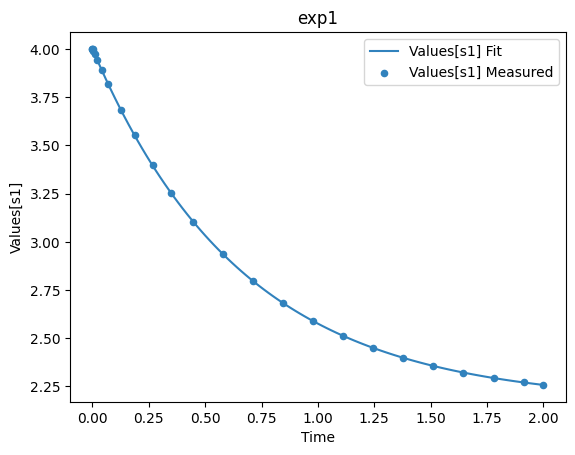

In [6]:
results: pd.DataFrame = basico.run_parameter_estimation(update_model=True)
basico.plot_per_experiment()

In [7]:
fit_solution = basico.task_parameterestimation.get_parameters_solution()
display(fit_solution)
#display(fit_solution.loc[fit_solution['name'] == 'values[Kf]']['sol'])
display(fit_solution.loc['Values[Kf]']['sol'])
print(fit_solution.columns)
print(fit_solution.index)

,lower,upper,sol,affected
name,,,,
Values[Kf],0.1,10.0,0.812494,[]
Values[Kr],0.2,20.0,0.687506,[]
Values[s0_init_uM],1e-08,20.0,0.000031,[]


0.8124941553266871

Index(['lower', 'upper', 'sol', 'affected'], dtype='object')
Index(['Values[Kf]', 'Values[Kr]', 'Values[s0_init_uM]'], dtype='object', name='name')


In [8]:
display(vcell_opt.result_set_from_fit(fit_solution))
basico.task_parameterestimation.get_fit_statistic(include_parameters=True, include_experiments=True, include_fitted=True)

{'Kf': 0.8124941553266871,
 'Kr': 0.6875063620515809,
 's0_init_uM': 3.108315653769391e-05}

  datapoints: 25 of 25


{'obj': 4.9787144868957555e-14,
 'rms': 4.4626066315084305e-08,
 'sd': 4.757154653254475e-08,
 'f_evals': 8,
 'failed_evals_exception': 0,
 'failed_evals_nan': 0,
 'cpu_time': 0.00042199999999999996,
 'data_points': 25,
 'valid_data_points': 25,
 'evals_per_sec': 5.2749999999999995e-05,
 'parameters': [{'name': 'Values[Kf].InitialValue',
   'lower': '0.1',
   'start': 0.8124941553266871,
   'value': 0.8124941553266871,
   'upper': '10.0',
   'std_dev': 9.099386340882232e-07,
   'coeff_of_variation': 0.0001119932528895984,
   'gradient': 0.005045944421179314},
  {'name': 'Values[Kr].InitialValue',
   'lower': '0.2',
   'start': 0.6875063620515809,
   'value': 0.6875063620515809,
   'upper': '20.0',
   'std_dev': 9.107832607394269e-07,
   'coeff_of_variation': 0.00013247633927656577,
   'gradient': 0.021536089913057506},
  {'name': 'Values[s0_init_uM].InitialValue',
   'lower': '1e-08',
   'start': 3.108315653769391e-05,
   'value': 3.108315653769391e-05,
   'upper': '20.0',
   'std_dev'